# 🐶🐱 Dog vs. Cat Image Classification
This notebook will guide you through building a simple **image classifier** to distinguish between **cats** and **dogs**.

**What you will learn:**
- How to load and preprocess image data
- How to visualize and understand image data
- How to apply dimensionality reduction techniques (PCA, t-SNE) and analyze data
- How to train a simple classifier (without deep learning)

Let's get started! 🚀

## 📂 Step 1: Downloading the Dataset
We will use a dataset of cat and dog images. The dataset is stored in a GitHub repository. **Run the cell below** to download it.

In [1]:
!git clone "https://github.com/ki-ljl/cnn-dogs-vs-cats.git"

Cloning into 'cnn-dogs-vs-cats'...
remote: Enumerating objects: 1479, done.
remote: Counting objects: 100% (1479/1479), done.
remote: Compressing objects: 100% (1456/1456), done.
remote: Total 1479 (delta 31), reused 1458 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (1479/1479), 32.95 MiB | 1.21 MiB/s, done.
Resolving deltas: 100% (31/31), done.


## 🏞 Step 2: Loading and Preprocessing Images
Images are stored in folders labeled **'cats'** and **'dogs'**. We will:
1. Load the images.
2. Convert them into numerical format (arrays).
3. Assign labels (0 for cats, 1 for dogs).

**Your task:** Complete the missing part in the `load_images()` function.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from PIL import Image
from numpy import asarray, save, load
import math


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


In [3]:
# dataset path
train_test_dir = ["training_data", "testing_data"]
cat_dog_dir = ["cats", "dogs"]
image_path = "data/%s/%s"
data_save_dir = "data/save"

In [4]:
# 1. All Images are added to a list
# 2. The same for labels (the name of the directory is the label)
def load_images(path_dir, train_test_dir, cat_dog_dir):
    """
    Loads images from the specified directory and assigns labels.

    Parameters:
    - path_dir (str): Path template for the dataset.
    - train_test_dir (str): Specifies whether loading training or testing data.
    - cat_dog_dir (str): Specifies whether loading "cats" or "dogs" images.

    Returns:
    - list_images (list): A list of loaded images.
    - list_labels (list): A list of labels (0 for cats, 1 for dogs).
    """
    
    # Task 1: Construct the full image path using path_dir, train_test_dir, and cat_dog_dir
    img_path = path_dir % (train_test_dir, cat_dog_dir)

    # Task 2: List all image filenames in the directory (Hint: Use listdir())
    img_names = 

    # Assign label: 0 for cats, 1 for dogs
    label = 

    # Initialize lists to store images and labels
    list_images = 
    list_labels = 

    # Task 3: Loop through the images and load them
    for img in img_names:
        # Load the image and convert it to RGB format
        img_current = Image.open(path.join(img_path, img)).convert('RGB')

        # Task 4: Append the loaded image to list_images


        # Task 5: Append the corresponding label to list_labels


    # Return the lists of images and labels
    return list_images, list_labels

#check code
data1 = load_images(image_path,train_test_dir[0],cat_dog_dir[0])
data2 = load_images(image_path,train_test_dir[0],cat_dog_dir[1])
data3 = load_images(image_path,train_test_dir[1],cat_dog_dir[0])
data4 = load_images(image_path,train_test_dir[1],cat_dog_dir[1])

data_image = data1[0] + data2[0] + data3[0] + data4[0]
data_label = data1[1] + data2[1] + data3[1] + data4[1]

#might arize error with numpy 1.24 or 1.23 it works with 1.22
photos = np.asarray(data_image, dtype='object')
labels = np.asarray(data_label, dtype='object')

print( photos.shape, labels.shape)

/var/folders/my/dvkmtwtx741_17803nw03zs80000gn/T/ipykernel_68783/3923140918.py:54: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  photos = np.asarray(data_image, dtype='object')


(1400,) (1400,)


```

```

### Saving the Data 

In [5]:
# If needed, save the photos (it make times) as numpy ndarrays
makedirs(data_save_dir, exist_ok=True)
save(data_save_dir+'/dogs_vs_cats_photos.npy', photos)
save(data_save_dir+'/dogs_vs_cats_labels.npy', labels)

# If needed load the photos
photos = load(data_save_dir+'/dogs_vs_cats_photos.npy',allow_pickle=True)
labels = load(data_save_dir+'/dogs_vs_cats_labels.npy',allow_pickle=True)

## 📊 Step 3: Visualizing Image Data
Before training a model, let's **visualize** some images to understand our dataset. 
**Your task:** Complete the missing part in the next cell.

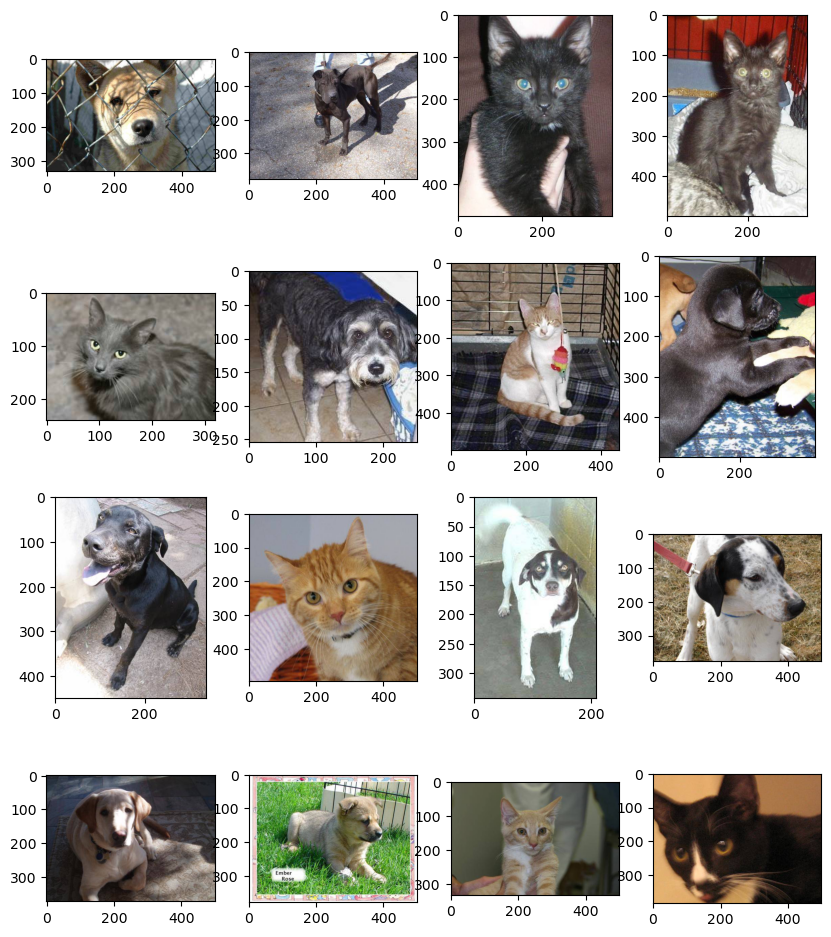

In [6]:
# Task: Visualizing random images from the dataset

# Task 1: Set a fixed random seed for reproducibility
np.random.seed(42)

# Task 2: Generate a random permutation of indices (Hint: Use np.random.permutation())
rndperm = 

# Task 3: Create a figure with specified size for visualization
plt.figure(figsize=(10, 12))

# Task 4: Loop through the first 16 images and display them
for i in range(16):
      # Create a 4x4 grid of subplots
    
    # Task 5: Display the randomly selected image (Hint: Use rndperm[i] to access images)
   

#Show the figure with all displayed images
plt.show()

```

```

# Data Preprocessing
Why is Data Processing Important?

Raw data, especially image data, often needs to be cleaned, transformed, and organized before it can be used for analysis or modeling. In this section, we will go through the key steps in processing image data for classification tasks.

In [7]:
#Let"s check again the size
print(np.asarray(photos[0]).shape)

# PIL Image is not presenting all the channels
print(photos[0].size)

# Just initialization in order to look for image dimensions (we can put zeros)
h_min, h_max = photos[0].size[0],photos[0].size[0]
w_min, w_max = photos[0].size[1], photos[0].size[1]

# dimension of images
for img in photos:
  h_min = min(h_min, img.size[0])
  h_max = max(h_max, img.size[0])
  w_min = min(w_min, img.size[1])
  w_max = max(w_max, img.size[1])

print('heigh:[',h_min,',',h_max,']', '\nwidth:[',w_min,',', w_max,']')

(303, 400, 3)
(400, 303)
heigh:[ 74 , 500 ] 
width:[ 50 , 500 ]


In [8]:
# Create names for features
feat_cols = [ 'P'+str(i) for i in range(200*200) ]

> First we convert the RGB image de grascale image. Then we reduce the size to 200*200.
> Finally, we scale the image to [0,1] by dividing by 255. 

> We extract only 500 images as it take a lot of time

In [9]:
# Create a DataFrame where each row represents a flattened image (feature vector)
df = pd.DataFrame([
    asarray(img.convert("L").resize((200, 200))).ravel() / 255  # Convert image to grayscale, resize, flatten, and normalize
    for img in photos[rndperm[:500]]  # Select the first 500 randomly permuted images
], columns=feat_cols)  # Assign column names for features

# Add a new column 'y' representing the labels (0 for cats, 1 for dogs)
df['y'] = labels[rndperm[:500]]  # Assign labels based on the same random selection

```

```
# Dimension Reduction for visualization

## 📉 Step 4: Applying Dimensionality Reduction (PCA & t-SNE)
To better understand the dataset, we will reduce the **high-dimensional image data** into a lower-dimensional space using **Principal Component Analysis (PCA)** and **t-SNE**.

**Your task:** Complete the missing PCA visualization code.

In [10]:
# Some doc: https://builtin.com/data-science/tsne-python


pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.20651722 0.10278373 0.08272516]


In [11]:
df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P39994,P39995,P39996,P39997,P39998,P39999,y,pca-one,pca-two,pca-three
0,0.501961,0.513725,0.521569,0.505882,0.509804,0.482353,0.364706,0.258824,0.215686,0.305882,...,0.282353,0.278431,0.333333,0.415686,0.415686,0.415686,1,-10.258115,-6.321472,20.417581
1,0.403922,0.368627,0.360784,0.349020,0.396078,0.400000,0.411765,0.380392,0.392157,0.400000,...,0.772549,0.756863,0.772549,0.819608,0.682353,0.654902,1,16.539315,3.217516,-11.828996
2,0.274510,0.294118,0.258824,0.270588,0.286275,0.266667,0.274510,0.250980,0.301961,0.286275,...,0.321569,0.290196,0.313725,0.301961,0.301961,0.313725,0,-14.747993,20.364852,-2.188245
3,0.211765,0.200000,0.192157,0.192157,0.184314,0.188235,0.168627,0.164706,0.160784,0.137255,...,0.972549,0.988235,0.988235,0.992157,0.964706,0.952941,0,3.308635,0.951117,-26.458293
4,0.576471,0.576471,0.580392,0.584314,0.584314,0.580392,0.584314,0.588235,0.588235,0.592157,...,0.250980,0.247059,0.247059,0.258824,0.247059,0.250980,0,0.007737,11.641940,12.377803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.262745,0.309804,0.290196,0.258824,0.301961,0.290196,0.266667,0.298039,0.282353,0.243137,...,0.200000,0.184314,0.176471,0.188235,0.192157,0.192157,0,-26.852065,-8.647758,19.454593
496,0.039216,0.050980,0.047059,0.047059,0.039216,0.105882,0.145098,0.133333,0.149020,0.145098,...,0.474510,0.431373,0.400000,0.454902,0.478431,0.474510,1,-32.387117,9.733448,-24.869789
497,0.533333,0.470588,0.372549,0.207843,0.290196,0.329412,0.317647,0.231373,0.207843,0.301961,...,0.156863,0.192157,0.192157,0.192157,0.188235,0.184314,0,18.485270,-38.749680,6.379962
498,0.596078,0.549020,0.501961,0.494118,0.494118,0.517647,0.537255,0.513725,0.462745,0.419608,...,0.709804,0.717647,0.709804,0.682353,0.670588,0.678431,1,17.711363,-7.881653,-7.319108


In [12]:
df.dtypes

P0           float64
P1           float64
P2           float64
P3           float64
P4           float64
              ...   
P39999       float64
y             object
pca-one      float64
pca-two      float64
pca-three    float64
Length: 40004, dtype: object

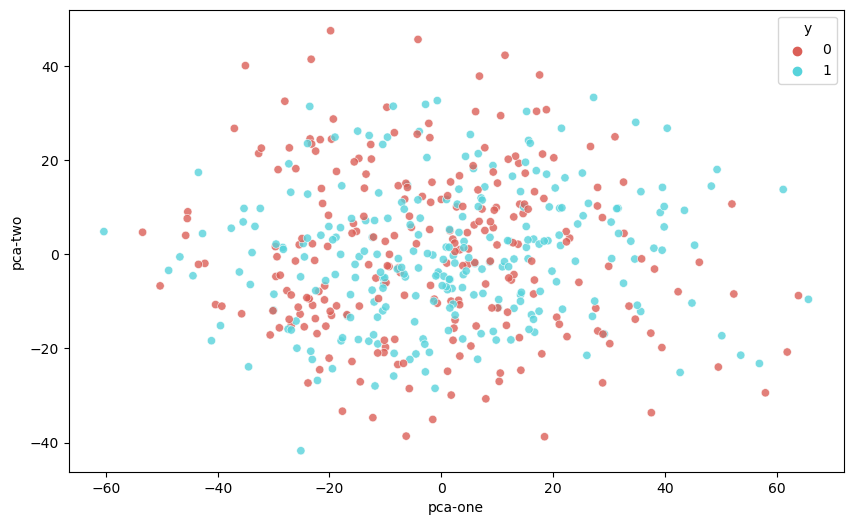

In [13]:
# Task: Visualizing the data using PCA scatter plot

# Task 1: Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Task 2: Use seaborn's scatterplot function to visualize the PCA-transformed data
sns.scatterplot(
    x=  # Task 3: Replace with the correct column name for the first principal component
    y=  # Task 4: Replace with the correct column name for the second principal component
    hue=  # Task 5: Define the label column (class labels)
    palette=sns.color_palette("hls", 2),  
    data=  # Task 6: Provide the dataset containing PCA-transformed features
    legend="full", 
    alpha=0.8  
)


plt.show()

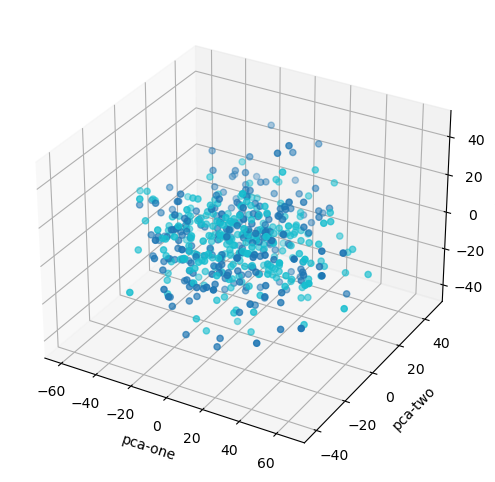

In [15]:
# Task: Visualizing PCA-transformed data in 3D space

# Create a figure with a specified size and add a 3D subplot
ax = plt.figure(figsize=(10, 6)).add_subplot(projection='3d')

# Task :1 Create a scatter plot in 3D space
ax.scatter(
    xs=  # Task 2: Replace with the correct column name for the first principal component
    ys=  # Task 3: Replace with the correct column name for the second principal component
    zs=  # Task 4: Replace with the correct column name for the third principal component
    c=  # Task 5: Define the label column (class labels)
    cmap='tab10'  
)

# Set axis labels for better readability
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

In [16]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[feat_cols])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.050s...
[t-SNE] Computed neighbors for 500 samples in 0.344s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 16.410616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.484062
[t-SNE] KL divergence after 300 iterations: 1.299545


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

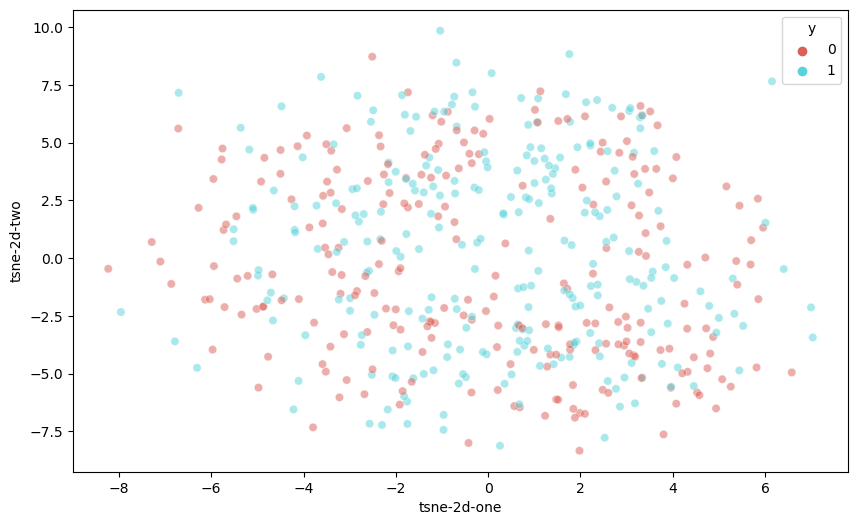

In [17]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.5
)

In [18]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols])

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)


Cumulative explained variation for 50 principal components: 0.7945243420071907


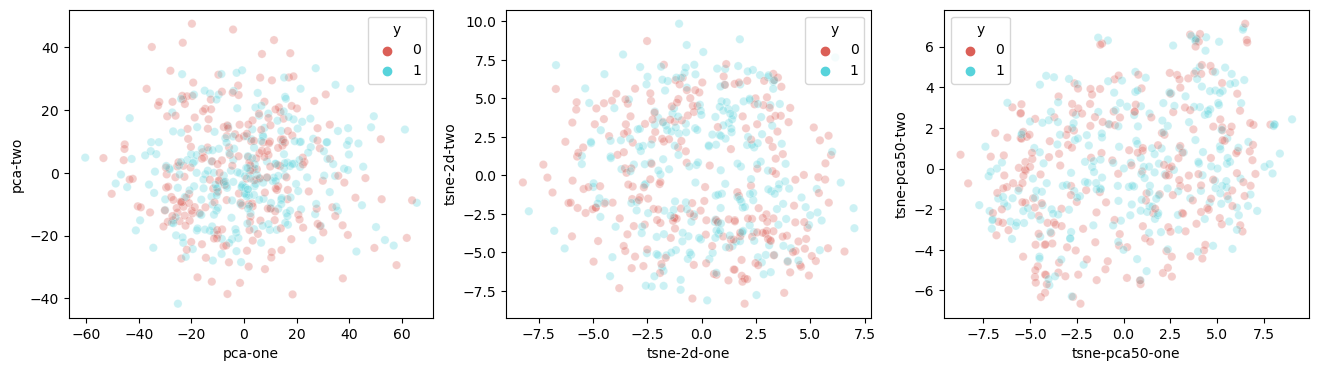

In [21]:
# Task 1: Add new columns to store t-SNE results
df['tsne-pca50-one'] =   # First t-SNE component from PCA-reduced features
df['tsne-pca50-two'] =   # Second t-SNE component from PCA-reduced features

#  Create a figure with three subplots
plt.figure(figsize=(16, 4))  # Define the figure size

# Task 2: Create the first subplot for PCA scatter plot
ax1 =  # Define the first subplot
sns.scatterplot(
    x=, y=,  # Task 4: Replace with PCA feature names
    hue="y",  # Color by class label
    palette=sns.color_palette("hls", 2),  # Use a color palette
    data=df,  # Provide the dataset
    legend="full",  # Display full legend
    alpha=0.3,  # Adjust transparency
    ax=ax1  # Assign to subplot
)

# Task 4: Create the second subplot for t-SNE 2D scatter plot



# Task 5: Create the third subplot for t-SNE applied after PCA (50 components)
ax3 = plt.subplot(1, 3, 3)  # Define the third subplot
sns.scatterplot(
    x=, y=,  # Task 6: Replace with t-SNE PCA feature names
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax3
)

plt.show()

## 🤖 Step 5: Training a Simple Classifier
we will train a traditional **machine learning classifier** to distinguish between cats and dogs.

**Your task:** Complete the missing classification code.

```

```
# Data Preparation

In [22]:
# transform the data once
df = pd.DataFrame([asarray(img.convert("L").resize((200,200))).ravel()/255 for img in photos], columns=feat_cols)
df['y'] = labels

X = df[feat_cols]
y = df['y'].astype('int')

In [23]:
# Task 1: Implement a custom train_test_split function similar to sklearn's version
def train_test_split(X, y, test_size=0.3, train_size=0.7, shuffle=True, random_state=42, stratify=True):
    """
    Splits dataset X and labels y into training and testing sets.
    
    Parameters:
    - X: Feature dataset (NumPy array)
    - y: Labels dataset (NumPy array)
    - test_size: Proportion of the dataset to include in the test split (default 0.3)
    - train_size: Proportion of the dataset to include in the train split (default 0.7)
    - shuffle: Whether to shuffle the dataset before splitting (default True)
    - random_state: Seed for reproducibility (default 42)
    - stratify: Whether to maintain class distribution in splits (default True)

    Returns:
    - X_train, X_test, y_train, y_test: Split dataset
    """

    # Task 2: Ensure reproducibility by setting a random seed
    np.
    # Check if the number of samples in X matches y
    assert X.shape[0] == y.shape[0], "Error: X and y should have the same number of samples (%d)" % X.shape[0]

    # Determine split ratio based on train_size or test_size
    if train_size is not None:
        ratio = train_size
    elif test_size is not None:
        ratio = 1 - test_size
    else:
        ratio = 0.5  # Default split if no sizes are provided

    # Task 3: Generate a shuffled index list
    rndperm = 
    
    if shuffle:
        rndperm = np.random.permutation(X.shape[0])  # Shuffle the indices

    # Compute the number of training samples
    train_sample_number = math.floor(X.shape[0] * ratio)
    list_train = rndperm[:train_sample_number]  # First part for training
    list_test = rndperm[train_sample_number:]  # Remaining for testing

    # Task 4: Implement stratified sampling to preserve class distribution
    if stratify:
        list_train = 
        list_test = 
        for key in np.unique(y):  # Loop through each class
            z = rndperm[(y[rndperm] == key)]  # Find indices for this class
            portion = math.floor(len(z) * ratio)  # Compute the training portion
            list_train.extend(z[:portion])  # Assign portion to training set
            list_test.extend(z[portion:])  # Assign remaining to test set

    # Create training and testing datasets based on selected indices
    X_train = X[list_train]
    X_test = X[list_test]
    y_train = y[list_train]
    y_test = y[list_test]

    return X_train, X_test, y_train, y_test

In [24]:
# We can save the df to numpy compressed to avoid the load time
df.to_pickle(data_save_dir+'/dogs_vs_cats_dataframe.npz')

In [25]:
#check the code
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, train_size=0.7, shuffle=True, random_state=42, stratify=True)

```

```
# Build Some Models

In [30]:
from sklearn.linear_model import  LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
# Attempting to compute accuracy directly (incorrect for regression models)
# Since predictions are continuous values, this comparison is not meaningful for classification
print ('Accuracy', sum(prediction==y_test)/y_test.shape[0])
# Compute accuracy and store it in a variable
accuracy_value_lr = sum((prediction>0.5) ==y_test)/y_test.shape[0]

# Print the accuracy
print("Accuracy:", accuracy_value_lr)

Accuracy 0.0
Accuracy: 0.504739336492891


In [31]:
# What the model learns
LR.coef_

array([-0.00105348, -0.0066357 , -0.00790424, ...,  0.01200186,
        0.01301236,  0.01328915])

In [32]:
# Read https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

from sklearn.linear_model import  LogisticRegression
# Not stable
LR = LogisticRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
# Compute accuracy and store it in a variable
accuracy_value_lrg = sum(prediction == y_test) / y_test.shape[0]

# Print the accuracy
print("Accuracy:", accuracy_value_lrg)

Accuracy: 0.5355450236966824


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html

from sklearn.linear_model import  RidgeClassifierCV, RidgeClassifier

rig = RidgeClassifier(random_state=42)
#rig = RidgeClassifierCV()
rig.fit(X_train, y_train)
prediction = rig.predict(X_test)
accuracy_value_rig = sum(prediction == y_test) / y_test.shape[0]

# Print the accuracy
print("Accuracy:", accuracy_value_rig)

Accuracy: 0.5071090047393365


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_value_svc = sum(prediction == y_test) / y_test.shape[0]

# Print the accuracy
print("Accuracy:", accuracy_value_svc)

Accuracy: 0.5521327014218009


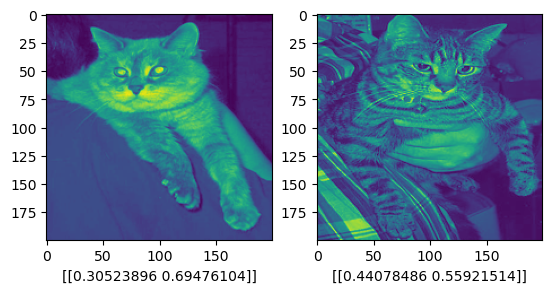

In [35]:
plt.subplot(1,2,1)
plt.xlabel(str(clf.predict_proba(X_test[0:1])))
plt.imshow(X_test[0].reshape(200,200))
plt.subplot(1,2,2)
plt.xlabel(str(clf.predict_proba(X_test[10:11])))
plt.imshow(X_test[10].reshape(200,200))
__= plt.show()

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, max_iter=300))
clf.fit(X_train, y_train)

print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[:5, :]))
accuracy_mlp = clf.score(X_test, y_test)
# Print the accuracy
print("Accuracy:", accuracy_mlp)

[[0.01951422 0.98048578]]
[1 1 0 1 0]
Accuracy: 0.566350710900474


## 🏆 Step 6: Evaluating the Model
After training, we need to evaluate our model's performance on unseen test images.

**Your task:** Complete the missing accuracy evaluation code and interpret the results.

In [40]:
# Create a dictionary with model names and their corresponding accuracy values
accuracy_results = {
    "Support Vector Classifier (SVC)": accuracy_value_svc,
    "Ridge Regression": accuracy_value_rig,
    "Multi-Layer Perceptron (MLP)": accuracy_mlp,
    "Logistic Regression (LReg)": accuracy_value_lrg,
    "Linear Regression (LR)": accuracy_value_lr
}

# Convert the dictionary into a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Accuracy"])

# Display the DataFrame
print(accuracy_df)

                             Model  Accuracy
0  Support Vector Classifier (SVC)  0.552133
1                 Ridge Regression  0.507109
2     Multi-Layer Perceptron (MLP)  0.566351
3       Logistic Regression (LReg)  0.535545
4           Linear Regression (LR)  0.504739


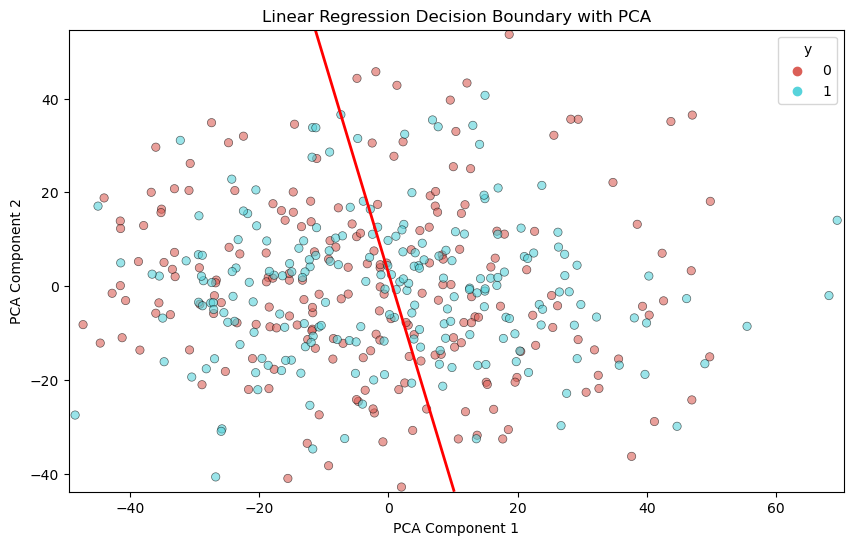

In [42]:

# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Apply PCA to reduce dimensions

# Step 2: Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression on the 2D PCA-transformed data
LR = LinearRegression()
LR.fit(X_train_pca, y_train)

# Step 4: Predict on the test set
prediction = LR.predict(X_test_pca)
binary_prediction = (prediction > 0.5).astype(int)  # Convert to binary labels

# Step 5: Plot decision boundary
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
sns.scatterplot(
    x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test,
    palette=sns.color_palette("hls", 2), alpha=0.6, edgecolor="black"
)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict for all points in the mesh grid
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)

# Labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Linear Regression Decision Boundary with PCA")

# Show the plot
plt.show()